In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

seed = None

In [2]:
df = pd.read_csv('dataset/winequality-red.csv')

In [3]:
# df[:10]
# df.groupby('quality').count()

In [4]:
X = df.drop(columns = ['QUALITY']).values
# astype(np.float32).values
y = df['QUALITY'].values

In [5]:
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_Y = encoder.transform(y)
# dummy_y = tf.keras.utils.to_categorical(encoded_Y)

eight_only = [0 if value == 8 else 1 for value in y]

In [6]:
# print(dummy_y[:10])
# print(y[:10])

In [7]:
# print(type(X))
# print(type(y))

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.3, random_state = seed)
X_train, X_test, y_train, y_test = train_test_split(X, eight_only, test_size = 0.3, random_state = seed)

In [9]:
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([  15, 1104]))
(array([0, 1]), array([  3, 477]))


In [10]:
tf.keras.backend.clear_session()

epochs_param = 100
input_dim = X_train.shape[1]
optimizer = 'adam'

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu, input_dim = input_dim,
# #                                 bias_initializer = 'ones'
#                                ))
# model.add(tf.keras.layers.Dropout(rate = 0.2, seed = seed))
# model.add(tf.keras.layers.Dense(6, activation = tf.nn.softmax))

# model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu, input_dim = input_dim))
model.add(tf.keras.layers.Dropout(rate = 0.2, seed = seed))
# model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu, input_dim = input_dim))
# model.add(tf.keras.layers.Dropout(rate = 0.2, seed = seed))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
current_model = model.fit(x = X_train, y = y_train,
                          validation_data = (X_test, y_test),
#                           batch_size = 128,
                          epochs = epochs_param, shuffle = True, verbose = 2)

Train on 1119 samples, validate on 480 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 4.2313 - acc: 0.3691 - val_loss: 0.2649 - val_acc: 0.8896
Epoch 2/100
 - 0s - loss: 0.8561 - acc: 0.7936 - val_loss: 0.0648 - val_acc: 0.9937
Epoch 3/100
 - 0s - loss: 0.4538 - acc: 0.9106 - val_loss: 0.0591 - val_acc: 0.9937
Epoch 4/100
 - 0s - loss: 0.4128 - acc: 0.9169 - val_loss: 0.0583 - val_acc: 0.9937
Epoch 5/100
 - 0s - loss: 0.2395 - acc: 0.9526 - val_loss: 0.0584 - val_acc: 0.9937
Epoch 6/100
 - 0s - loss: 0.2481 - acc: 0.9544 - val_loss: 0.0585 - val_acc: 0.9937
Epoch 7/100
 - 0s - loss: 0.2341 - acc: 0.9553 - val_loss: 0.0587 - val_acc: 0.9937
Epoch 8/100
 - 0s - loss: 0.2267 - acc: 0.9696 - val_loss: 0.0587 - val_acc: 0.9937
Epoch 9/100
 - 0s - loss: 0.1972 - acc: 0.9678 - val_loss: 0.0587 - val_acc: 0.9937
Epoch 10/100
 - 0s - loss: 0.1849 - acc: 0.9651 - val_loss: 0.0593 - val_acc: 0.9937
Epoch 11/100
 - 0s - loss: 0.1862 - acc: 0.9732 - val_loss: 0.05

Epoch 94/100
 - 0s - loss: 0.0942 - acc: 0.9866 - val_loss: 0.0572 - val_acc: 0.9937
Epoch 95/100
 - 0s - loss: 0.0856 - acc: 0.9866 - val_loss: 0.0559 - val_acc: 0.9937
Epoch 96/100
 - 0s - loss: 0.0888 - acc: 0.9866 - val_loss: 0.0564 - val_acc: 0.9937
Epoch 97/100
 - 0s - loss: 0.0829 - acc: 0.9866 - val_loss: 0.0562 - val_acc: 0.9937
Epoch 98/100
 - 0s - loss: 0.0788 - acc: 0.9866 - val_loss: 0.0560 - val_acc: 0.9937
Epoch 99/100
 - 0s - loss: 0.0904 - acc: 0.9866 - val_loss: 0.0557 - val_acc: 0.9937
Epoch 100/100
 - 0s - loss: 0.0865 - acc: 0.9866 - val_loss: 0.0576 - val_acc: 0.9937


In [15]:
pred = model.predict(x = X_test)

from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
roc_auc = {}
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[i], pred[i], pos_label = 0)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/home/xtian209/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [14]:
y_test = np.reshape(y_test, (len(y_test), 1))
pred = np.reshape(pred, (len(y_test), 1))

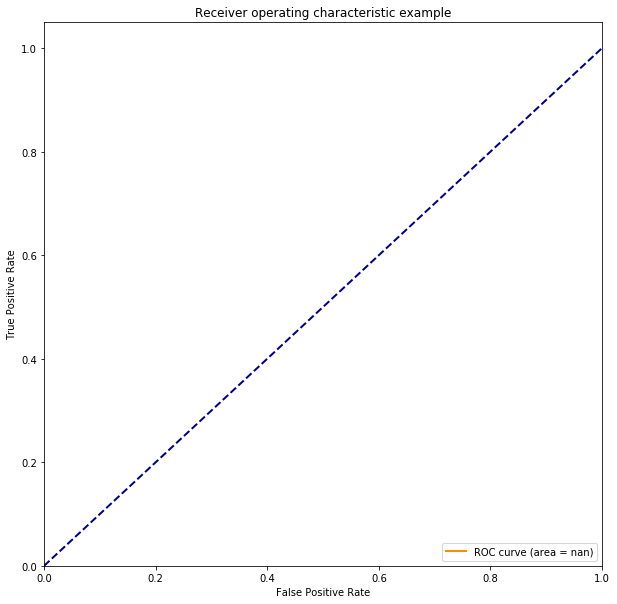

In [16]:
plt.figure(figsize = (10, 10))
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()